In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# 필요한 모듈과 데이터 불러오기
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
## 데이터셋 불러오기
from google.colab import files
data = pd.read_csv("/content/drive/MyDrive/빅데이터응용/팀 프로젝트/데이터/df_cloudSea.csv")

In [5]:
data

,Unnamed: 0,isCloudSea,Previous Temperature,Previous Precipitation,Previous Humidity,Previous Pressure,Sunrise Temperature,Sunrise Wind Speed,Sunrise Humidity,Sunrise Pressure,Sunrise Cloud Coverage,Diurnal Temperature Range
0,0,1.0,5.8,0.0,84.0,1001.4,3.2,0.0,93.0,1003.0,0.0,-2.6
1,1,1.0,8.9,0.0,91.0,1012.2,9.3,0.8,92.0,1012.4,7.0,0.4
2,2,1.0,12.1,0.0,87.0,1001.3,10.1,2.4,91.0,1002.7,7.0,-2.0
3,3,1.0,10.0,0.0,83.0,998.3,7.9,2.5,87.0,998.9,0.0,-2.1
4,4,1.0,1.7,0.0,100.0,987.3,-0.3,0.0,100.0,989.1,10.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
799,801,1.0,24.0,0.0,90.0,990.1,24.1,0.0,90.0,989.8,0.0,0.1
800,802,0.0,-10.8,0.0,89.0,941.9,-13.1,0.3,87.0,941.8,0.0,-2.3
801,803,0.0,-4.5,0.0,61.0,1008.7,-7.0,0.6,72.0,1008.7,0.0,-2.5
802,804,0.0,8.5,0.0,76.0,1015.7,7.7,0.3,85.0,1015.7,0.0,-0.8


Data의 분포 확인

In [6]:
class_counts = data['isCloudSea'].value_counts()
class_counts

0.0    505
1.0    299
Name: isCloudSea, dtype: int64

In [7]:
class_imbalance_ratio = class_counts[0] / class_counts[1]

print("클래스 불균형 비율:", class_imbalance_ratio)

클래스 불균형 비율: 1.6889632107023411


In [8]:
data = data.drop('Unnamed: 0', axis=1)
data

,isCloudSea,Previous Temperature,Previous Precipitation,Previous Humidity,Previous Pressure,Sunrise Temperature,Sunrise Wind Speed,Sunrise Humidity,Sunrise Pressure,Sunrise Cloud Coverage,Diurnal Temperature Range
0,1.0,5.8,0.0,84.0,1001.4,3.2,0.0,93.0,1003.0,0.0,-2.6
1,1.0,8.9,0.0,91.0,1012.2,9.3,0.8,92.0,1012.4,7.0,0.4
2,1.0,12.1,0.0,87.0,1001.3,10.1,2.4,91.0,1002.7,7.0,-2.0
3,1.0,10.0,0.0,83.0,998.3,7.9,2.5,87.0,998.9,0.0,-2.1
4,1.0,1.7,0.0,100.0,987.3,-0.3,0.0,100.0,989.1,10.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...
799,1.0,24.0,0.0,90.0,990.1,24.1,0.0,90.0,989.8,0.0,0.1
800,0.0,-10.8,0.0,89.0,941.9,-13.1,0.3,87.0,941.8,0.0,-2.3
801,0.0,-4.5,0.0,61.0,1008.7,-7.0,0.6,72.0,1008.7,0.0,-2.5
802,0.0,8.5,0.0,76.0,1015.7,7.7,0.3,85.0,1015.7,0.0,-0.8


In [9]:
print(data.head())

   isCloudSea  Previous Temperature  Previous Precipitation  \
0         1.0                   5.8                     0.0   
1         1.0                   8.9                     0.0   
2         1.0                  12.1                     0.0   
3         1.0                  10.0                     0.0   
4         1.0                   1.7                     0.0   

   Previous Humidity  Previous Pressure  Sunrise Temperature  \
0               84.0             1001.4                  3.2   
1               91.0             1012.2                  9.3   
2               87.0             1001.3                 10.1   
3               83.0              998.3                  7.9   
4              100.0              987.3                 -0.3   

   Sunrise Wind Speed  Sunrise Humidity  Sunrise Pressure  \
0                 0.0              93.0            1003.0   
1                 0.8              92.0            1012.4   
2                 2.4              91.0            10

In [10]:
import matplotlib.pyplot as plt

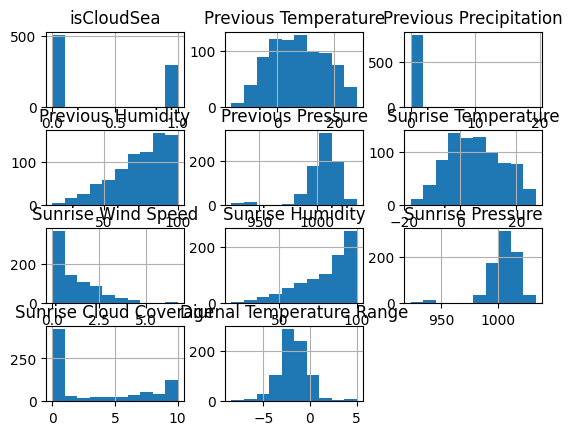

In [11]:
# 각 열에 대한 히스토그램 그리기
data.hist()
plt.show()



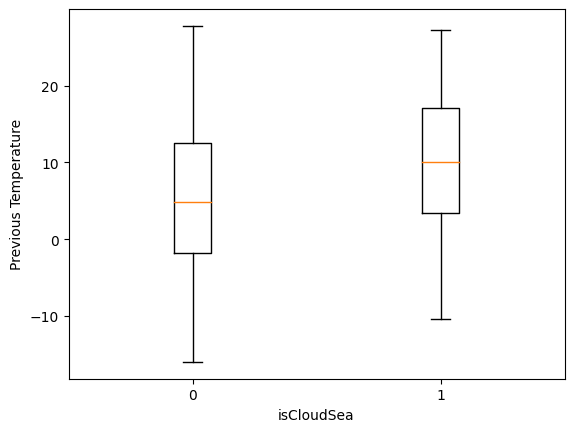

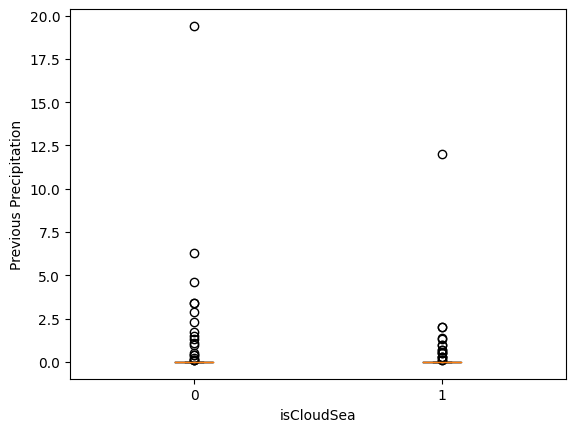

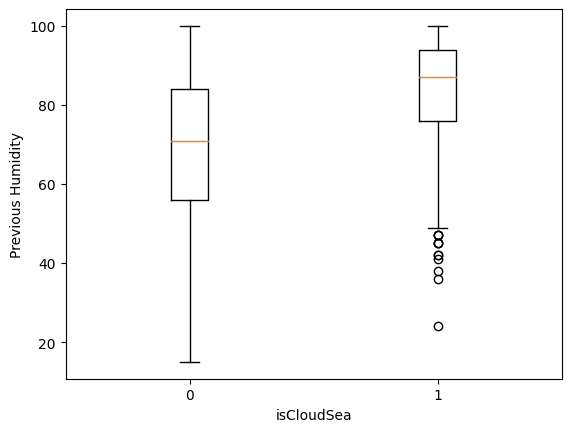

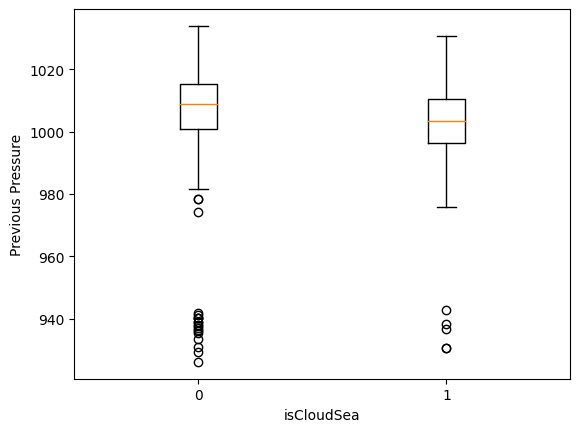

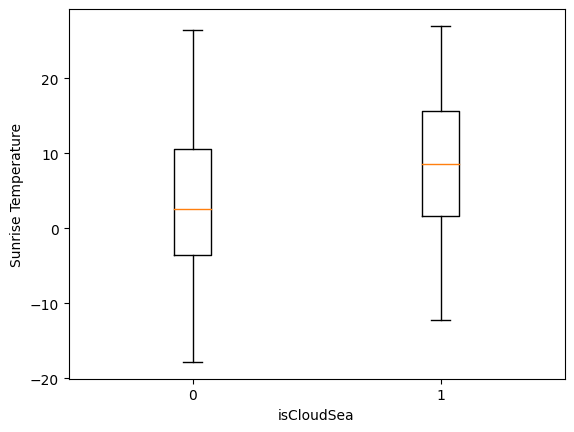

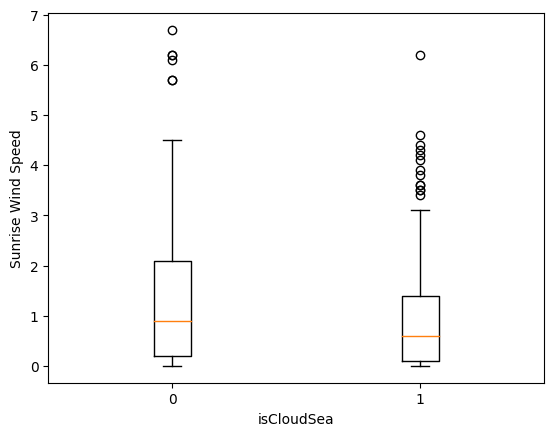

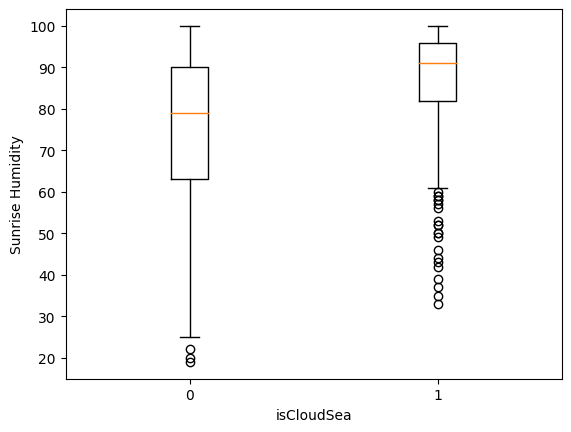

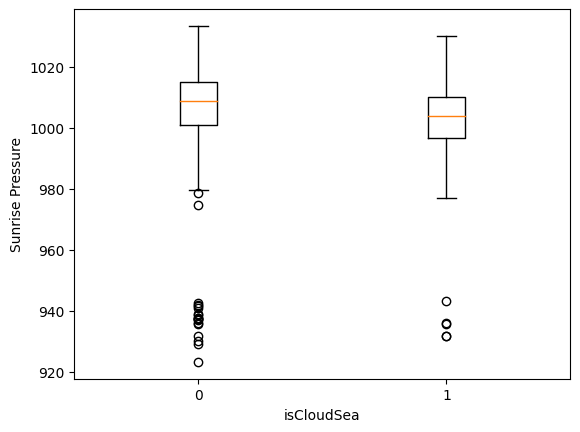

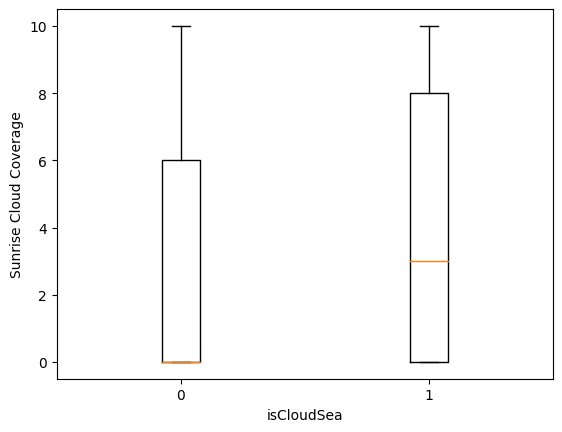

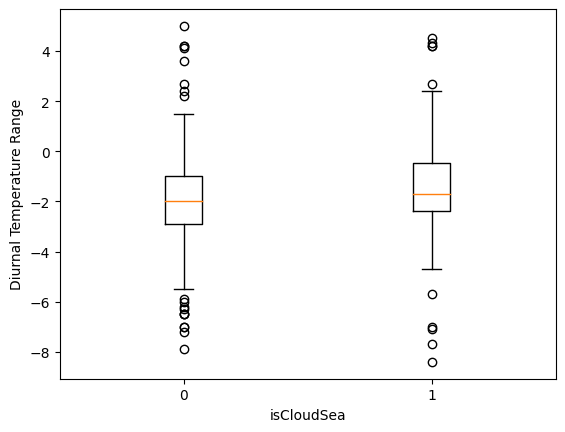

In [12]:
# "isCloudSea"와 다른 열 간의 box plot 그리기
for column in data.columns:
    if column != "isCloudSea":
        plt.boxplot([data[data["isCloudSea"] == 0][column], data[data["isCloudSea"] == 1][column]])
        plt.xlabel("isCloudSea")
        plt.ylabel(column)
        plt.xticks([1, 2], ['0', '1'])
        plt.show()

오버 샘플링

In [13]:
from imblearn.over_sampling import SMOTE

# 특성과 타겟 데이터 분리
X = data.drop('isCloudSea', axis=1)
y = data['isCloudSea']

# 오버 샘플링
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 오버 샘플링된 데이터프레임
resampled_data = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['isCloudSea'])], axis=1)

In [14]:
# feature 와 label 분리
feature_columns = resampled_data.drop(['isCloudSea'], axis=1).columns

X = resampled_data[feature_columns]
y = resampled_data['isCloudSea']

In [15]:
# trian 과 test 셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [16]:
print(X_train.shape)
print(y_test.shape)
print(X_train.shape)
print(y_test.shape)

(808, 10)
(202,)
(808, 10)
(202,)


In [17]:
# 스태킹 모델에 사용할 알고리즘 - KNN, 랜덤포레스트, AdaBoost, 의사결정나무, 로지스틱회귀
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# 개별 ML 모델 객체 생성 (기반모델)
knn_clf = KNeighborsClassifier()
rf_clf = RandomForestClassifier()
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier()

# 메타모델(스태킹으로 만들어진 데이터 학습 및 예측)
lr_final = LogisticRegression(C=10)

In [18]:
# 개별 모델 학습
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier()

In [19]:
#학습한 모델을 저장
import joblib

In [20]:
joblib.dump(knn_clf, "knn.pkl")
joblib.dump(rf_clf, "rf.pkl")
joblib.dump(dt_clf, "dt.pkl")
joblib.dump(ada_clf, "ada.pkl")

['ada.pkl']

In [21]:
# 기반 모델 예측 세트와 정확도 확인
knn = knn_clf.predict(X_test)
rf = rf_clf.predict(X_test)
dt = dt_clf.predict(X_test)
ada = ada_clf.predict(X_test)


print('KNN 정확도 :',accuracy_score(y_test, knn))
print('랜덤 포레스트 정확도 :',accuracy_score(y_test, rf))
print('의사결정나무 정확도 :',accuracy_score(y_test, dt))
print('AdaBoost 정확도 :',accuracy_score(y_test, ada))

KNN 정확도 : 0.7623762376237624
랜덤 포레스트 정확도 : 0.7673267326732673
의사결정나무 정확도 : 0.7376237623762376
AdaBoost 정확도 : 0.6534653465346535


In [22]:
# 기반 모델의 예측 결과를 스태킹
stacked = np.array([knn, rf, dt, ada])
print(stacked.shape)

# transpose를 이용, 행과 열의 위치를 교환
stacked = np.transpose(stacked)
print(stacked.shape)

(4, 202)
(202, 4)


In [23]:
# 메타 모델은 기반모델의 예측결과를 기반으로 학습
lr_final.fit(stacked, y_test)
lr_pred = lr_final.predict(stacked)

print('최종 메타 모델 정확도 : ',accuracy_score(y_test, lr_pred))

최종 메타 모델 정확도 :  0.7920792079207921


정확도 개선 방법 1 - 메타모델을 변경한다.
  * 로지스틱 회귀  ->  SVM, 그래디언트 부스팅 등등
  * 그래디언트 부스팅 활용



In [24]:
# sklearn에서 제공하는 GradientBoostingClassifier 앙상블모델 적용
from sklearn.ensemble import GradientBoostingClassifier
gbc_final = GradientBoostingClassifier()

gbc_final.fit(stacked, y_test)
gbc_pred = gbc_final.predict(stacked)

print('GBC 메타 모델 정확도 : ',accuracy_score(y_test, gbc_pred))

GBC 메타 모델 정확도 :  0.801980198019802


정확도가 실행할 때마다 다르게 나오기는 하는데... 이유를 모르겠음.
확실한건 로지스틱 회귀보다 그래디언트 부스팅 정확도가 더 높아짐.






In [25]:
# XGradientBoost을 활용한 방법
# xgboost 에서 XGBClassifier 모델 사용
from xgboost import XGBClassifier
xgbc_final = XGBClassifier(objective='binary:logitraw') # 손실 함수를 이진 분류 손실 함수로 적용

xgbc_final.fit(stacked, y_test)
xgbc_pred = xgbc_final.predict(stacked)

print('XGBC 메타 모델 정확도 : ',accuracy_score(y_test, xgbc_pred))

XGBC 메타 모델 정확도 :  0.7871287128712872


XGBoost는 다음과 같은 주요 특징을 갖고 있습니다:

* Regularization: 트리의 복잡도를 제어하기 위한 정규화 기법을 제공하여 과적합을 방지합니다.
* 조기 종료 (Early Stopping): 모델 학습을 중지하기 위한 최적의 시점을 자동으로 결정하여 과적합을 방지하고 효율적인 학습을 도모합니다.
* 자체적인 교차 검증: 내부적으로 교차 검증을 수행하여 모델의 성능을 평가하고 최적의 매개변수를 선택할 수 있습니다.
* 다양한 손실 함수 지원: 분류 문제에서는 로지스틱 손실과 이진 분류 손실, 회귀 문제에서는 최소 제곱 오차와 절대값 오차 등 다양한 손실 함수를 지원합니다.



정확도 개선 방법 2 - 개별 모델을 추가/제거
* 로지스틱 회귀를 개별 모델에 추가
* 그냥 개별 모델을 앙상블 모델로 -> "메타 앙상블"

메타 앙상블은 일반적인 앙상블 방법과 동일한 원리를 따릅니다. 다만, 앙상블 모델 자체가 개별 모델로 사용되며, 개별 모델들의 예측 결과를 결합하여 최종 예측을 수행합니다. 이는 모델 간의 상호작용과 다양성을 더욱 강화시키는 데 도움을 줄 수 있습니다.

In [26]:
# LogisticRegression() 추가
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr = lr_clf.predict(X_test)
print('로지스틱회귀 정확도 :',accuracy_score(y_test, lr))

로지스틱회귀 정확도 : 0.6683168316831684


In [39]:
joblib.dump(lr_clf, "lr.pkl")

['lr.pkl']

In [27]:
# 기반 모델의 예측 결과를 스태킹
stacked = np.array([knn, rf, dt, ada, lr]) #lr 추가
print(stacked.shape)

# transpose를 이용, 행과 열의 위치를 교환
stacked = np.transpose(stacked)
print(stacked.shape)

(5, 202)
(202, 5)


In [28]:
# 메타 모델은 기반모델의 예측결과를 기반으로 학습
xgbc_final.fit(stacked, y_test)
final_pred = xgbc_final.predict(stacked)

print('최종 메타 모델 정확도 : ',accuracy_score(y_test, final_pred))

최종 메타 모델 정확도 :  0.7970297029702971


In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

# 정밀도, 재현율, F1 점수 계산
precision = precision_score(y_test, final_pred)
recall = recall_score(y_test, final_pred)
f1 = f1_score(y_test, final_pred)

print(f"정밀도: {precision}")
print(f"재현율: {recall}")
print(f"F1 점수: {f1}")

정밀도: 0.8444444444444444
재현율: 0.7378640776699029
F1 점수: 0.7875647668393781


**precision_score와 accuracy_score의 차이! :**

precision_score: **정밀도는 양성으로 예측한 샘플 중에서 실제로 양성인 샘플의 비율을 나타냅니다.** 즉, 모델이 양성으로 예측한 것 중에서 실제로 양성인 샘플의 비율을 측정합니다. 높은 정밀도는 모델이 양성으로 예측한 샘플 중에서 실제로 양성인 샘플을 잘 식별하는 것을 의미합니다. 정밀도는 거짓 양성(FP)을 줄이는 데 초점을 둡니다.

accuracy_score: 정확도는 전체 샘플 중에서 올바르게 예측한 샘플의 비율을 나타냅니다. 즉, 모델이 정확하게 예측한 샘플의 비율을 측정합니다. 높은 정확도는 모델이 전체적으로 올바르게 예측하는 것을 의미합니다. 정확도는 모든 예측 결과를 고려하며, 양성과 음성을 모두 고려합니다.

운해 예측에서 정밀도가 더 중요함!

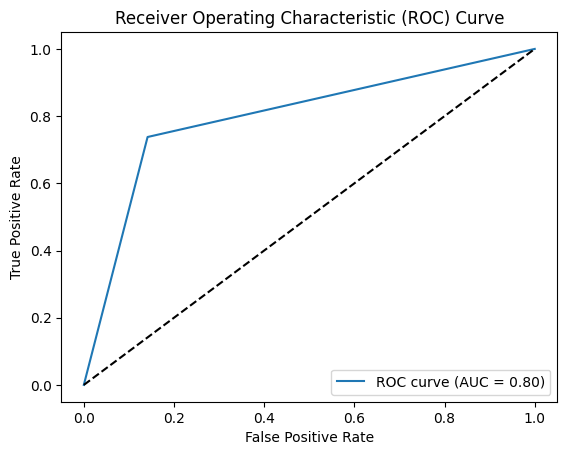

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# ROC 곡선 그리기
fpr, tpr, thresholds = roc_curve(y_test, final_pred)
roc_auc = roc_auc_score(y_test, final_pred)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [31]:
joblib.dump(xgbc_final, "xgbc.pkl")

['xgbc.pkl']

In [32]:
appid = "dd067a9aa888d5941ce0662190c0a2f4"
geo = {"함양": [35.52, 127.75], "서울": [37.6387, 127.0370], "인제": [38.06, 128.17], "합천": [35.50, 128.16], "제천": [37.13, 128.19], "울산": [35.53, 129.31], "부산": [35.17, 129.07], "강진": [34.80, 126.69], "양평": [37.21, 127.18], "광주": [35.15, 126.85], "금산": [36.03, 127.48], "태백": [37.16, 128.98], "충주": [36.99, 127.92], "대구": [35.87, 128.60], "파주": [37.75, 126.78], "수원": [37.26, 127.02]}
url = "http://api.openweathermap.org/data/2.5/forecast?lat="+str(geo["서울"][0])+"&lon="+str(geo["서울"][1])+"&appid="+ appid +"&units=metric"

In [33]:
import requests
import json
from datetime import datetime, timezone, timedelta
import pandas as pd

In [34]:
response = requests.get(url)
json_data = response.json()
s1 = json.dumps(json_data)
json_object = json.loads(s1)
forecast_list = json_object['list']

In [35]:
days = []

KST = timezone(timedelta(hours=9))
now = datetime.now(KST)
days.append(now.strftime('%Y-%m-%d'))
for i in range(1, 5):
  day = now + timedelta(days=i)
  days.append(day.strftime('%Y-%m-%d'))
midnight = "00:00:00"
sunrise = "06:00:00"


In [36]:
df = pd.DataFrame(index=[1])
pre_temp = 0

for forecast in forecast_list:

  #API 결과 값에서 나오는 시간은 UTC(영국) 기준이기 때문에 9시간을 더해줘야 함
  datetime_format = "%Y-%m-%d %H:%M:%S"
  datetime_string = forecast['dt_txt']
  datetime_result = datetime.strptime(datetime_string, datetime_format)
  datetime_result += timedelta(hours=9)
  day = datetime_result.strftime('%Y-%m-%d')
  dayTime = datetime_result.strftime('%H:%M:%S')

  if day == days[1]: #임시로
    if dayTime == midnight:
      newColumns = ['Previous Temperature', 'Previous Precipitation', 'Previous Humidity', 'Previous Pressure']
      pre_temp = float(forecast['main']['temp'])
      rain = 0
      humidity = forecast['main']['humidity']
      pressure = forecast['main']['pressure']
      if forecast['weather'][0]['main'] == 'Rain':
        rain = forecast['rain']['3h']
      df[newColumns] = pd.Series([pre_temp, rain, humidity, pressure])
      continue
    if dayTime == sunrise:
      newColumns = ['Sunrise Temperature', 'Sunrise Wind Speed', 'Sunrise Humidity', 'Sunrise Pressure', 'Sunrise Cloud Coverage', 'Diurnal Temperature Range']
      temp = forecast['main']['temp']
      wind = forecast['wind']['speed']
      humidity = forecast['main']['humidity']
      pressure = forecast['main']['pressure']
      clouds = float(forecast['clouds']['all'])/10
      temp_range = float(temp) - pre_temp
      df[newColumns] = pd.Series([temp, wind, humidity, pressure, clouds, temp_range])
      continue

df

,Previous Temperature,Previous Precipitation,Previous Humidity,Previous Pressure,Sunrise Temperature,Sunrise Wind Speed,Sunrise Humidity,Sunrise Pressure,Sunrise Cloud Coverage,Diurnal Temperature Range
1,25.97,0.0,70.0,1015.0,22.6,0.31,76.0,1015.0,0.0,-3.37


In [37]:
## df로 최종 예측

knn = knn_clf.predict(df)
rf = rf_clf.predict(df)
dt = dt_clf.predict(df)
ada = ada_clf.predict(df)
lr = lr_clf.predict(df)

stacked = np.array([knn, rf, dt, ada, lr])
stacked = np.transpose(stacked)

final_pred = xgbc_final.predict(stacked)

final_pred[0]

0

In [42]:
knn_clf = joblib.load("/content/knn.pkl")
rf_clf = joblib.load("/content/rf.pkl")
dt_clf = joblib.load("/content/dt.pkl")
ada_clf = joblib.load("/content/ada.pkl")
lr_clf = joblib.load("/content/lr.pkl")
xgbc_final = joblib.load("/content/xgbc.pkl")

knn = knn_clf.predict(df)
rf = rf_clf.predict(df)
dt = dt_clf.predict(df)
ada = ada_clf.predict(df)
lr = lr_clf.predict(df)

stacked = np.array([knn, rf, dt, ada, lr])
stacked = np.transpose(stacked)

final_pred = xgbc_final.predict(stacked)

final_pred[0]

0